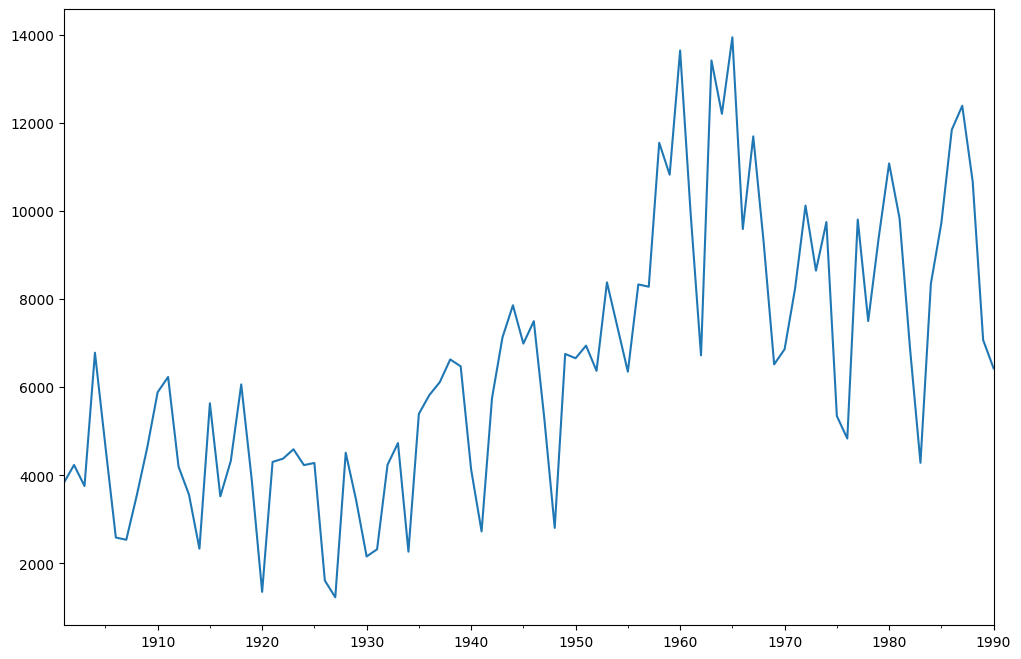

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


AIC: 1616.0337


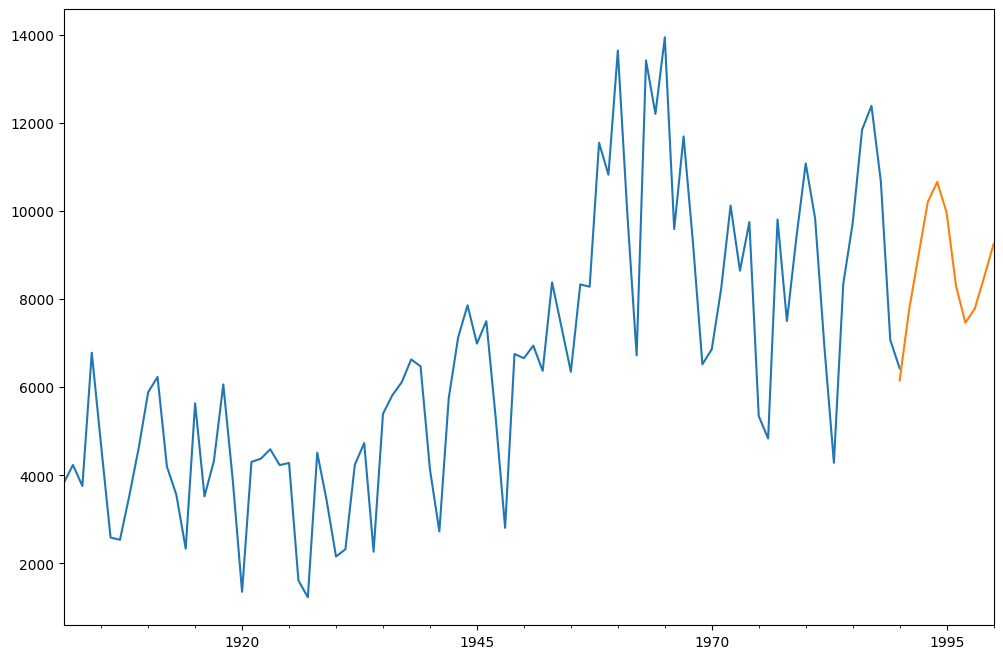

In [1]:
# 用ARMA进行时间序列预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# 使用新的ARIMA模块替代已弃用的ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

# 创建数据
data = [3821, 4236, 3758, 6783, 4664, 2589, 2538, 3542, 4626, 5886, 6233, 4199, 3561, 2335, 5636, 3524, 
4327, 6064, 3912, 1356, 4305, 4379, 4592, 4233, 4281, 1613, 1233, 4514, 3431, 2159, 2322, 4239, 4733, 
2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 
6944, 6372, 8380, 7366, 6352, 8333, 8281, 11548, 10823, 13642, 9973, 6723, 13416, 12205, 13942, 9590, 
11693, 9276, 6519, 6863, 8237, 10122, 8646, 9749, 5346, 4836, 9806, 7502, 9387, 11078, 9832, 6886, 4285, 
8351, 9725, 11844, 12387, 10666, 7072, 6429]
data=pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')
#print(data_index)

# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12,8))
plt.show()

# 创建ARIMA模型，使用order=(7,0,0)表示ARMA(7,0)
arma = ARIMA(data, order=(7,0,0)).fit()
print('AIC: %0.4lf' %arma.aic) # Loss

# 模型预测
predict_y = arma.predict(start='1990', end='2000')

# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.loc['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

AIC: 1598.6183


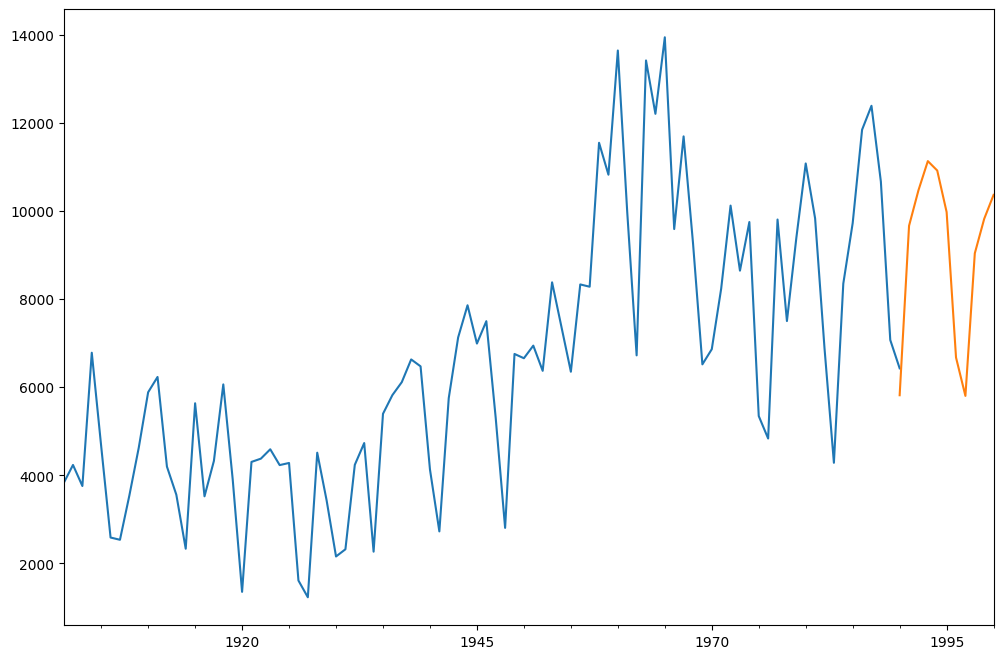

In [2]:
# 创建ARIMA模型，使用order=(7,0,0)表示ARMA(7,0)
arma = ARIMA(data, order=(7,0,7)).fit()
print('AIC: %0.4lf' %arma.aic) # Loss

# 模型预测
predict_y = arma.predict(start='1990', end='2000')

# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.loc['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()

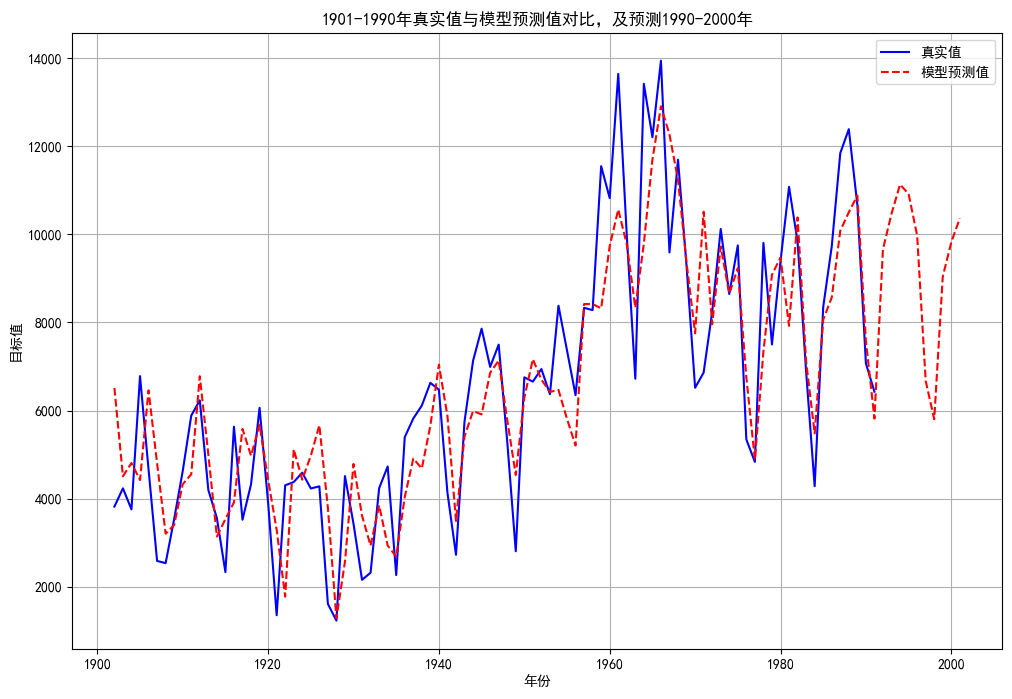

In [5]:
# =============================
# 反向预测1901-1990年，并与真实值对比
# =============================
# 使用已训练好的arma模型对1901-1990年进行预测

import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False    # 正常显示负号

reverse_predict = arma.predict(start='1901', end='2000')

plt.figure(figsize=(12,8))
# 绘制真实值（蓝色）
plt.plot(data.index, data.values, label='真实值', color='blue')
# 绘制模型预测值（红色虚线）
plt.plot(reverse_predict.index, reverse_predict.values, label='模型预测值', color='red', linestyle='--')
plt.xlabel('年份')
plt.ylabel('目标值')
plt.title('1901-1990年真实值与模型预测值对比，及预测1990-2000年')
plt.legend()
plt.grid(True)
plt.show()